In [1]:
import pyspark
from random import randint, random, choice
import matplotlib.pyplot as plt

sc = pyspark.SparkContext('local[*]')

In [2]:
from dataGenerator.rowGenerator import *
from dataGenerator.datasetGenerator import *
from datetime import datetime

dataset = datasetGenerator()
dataset.addGenerator(randomFromListGenerator(),list=['P&P103','P&P104','P&P105'],keyName="machineId")
dataset.addGenerator(intGenerator(),min=1,max=5000,keyName="itemId")
dataset.addGenerator(intGenerator(),min=1,max=10,keyName="errors")
dataset.addGenerator(dateGenerator(),min=1,max=10,keyName="ts")
dataset.addGenerator(randomFromListGenerator(),list=['In Progress', 'Idle','Done'],keyName="status")

rdd = sc.parallelize(dataset.generateDataset(1000)).persist()

In [3]:
rdd.take(5)

[{'machineId': 'P&P103',
  'itemId': 2570,
  'errors': 2,
  'ts': datetime.datetime(2014, 5, 7, 6, 34, 4),
  'status': 'Idle'},
 {'machineId': 'P&P105',
  'itemId': 2839,
  'errors': 5,
  'ts': datetime.datetime(2011, 5, 22, 11, 42, 2),
  'status': 'In Progress'},
 {'machineId': 'P&P104',
  'itemId': 4839,
  'errors': 5,
  'ts': datetime.datetime(2012, 2, 12, 3, 59, 14),
  'status': 'Idle'},
 {'machineId': 'P&P103',
  'itemId': 2802,
  'errors': 7,
  'ts': datetime.datetime(2020, 8, 5, 5, 15, 42),
  'status': 'In Progress'},
 {'machineId': 'P&P105',
  'itemId': 1001,
  'errors': 1,
  'ts': datetime.datetime(2011, 12, 24, 17, 22, 52),
  'status': 'In Progress'}]

In [4]:
notdone = rdd.filter(lambda x: x.get('status') != 'Done')
notdone.take(2)

[{'machineId': 'P&P103',
  'itemId': 2570,
  'errors': 2,
  'ts': datetime.datetime(2014, 5, 7, 6, 34, 4),
  'status': 'Idle'},
 {'machineId': 'P&P105',
  'itemId': 2839,
  'errors': 5,
  'ts': datetime.datetime(2011, 5, 22, 11, 42, 2),
  'status': 'In Progress'}]

In [5]:
timeframe = notdone.filter(lambda x: x.get('ts').month >= 1 and x.get('ts').month <= 10)
timeframe.take(2)

[{'machineId': 'P&P103',
  'itemId': 2570,
  'errors': 2,
  'ts': datetime.datetime(2014, 5, 7, 6, 34, 4),
  'status': 'Idle'},
 {'machineId': 'P&P105',
  'itemId': 2839,
  'errors': 5,
  'ts': datetime.datetime(2011, 5, 22, 11, 42, 2),
  'status': 'In Progress'}]

In [6]:
res = timeframe.map(lambda x: (x.get('ts').weekday(), x.get('errors'))).reduceByKey(lambda a,b: a+b)
res.collect()

[(0, 465), (1, 461), (2, 371), (3, 395), (4, 411), (5, 509), (6, 398)]

<BarContainer object of 7 artists>

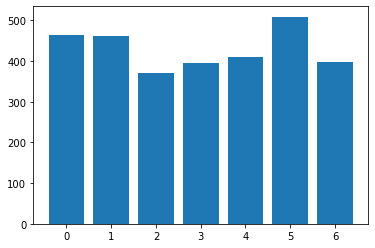

In [7]:
plt.bar(res.map(lambda x: x[0]).collect(),res.map(lambda x: x[1]).collect())